## 1. Import necessary libraries

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


In [122]:
train_dataset = pd.read_csv('/Users/shirinwadood/Desktop/projects/classification/Devices-Price-Classification-System-/dataset/train - train.csv')
test_dataset = pd.read_csv('/Users/shirinwadood/Desktop/projects/classification/Devices-Price-Classification-System-/dataset/test - test.csv')

In [4]:
train_dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [123]:
test_dataset.head()
test_dataset.drop(columns=['id'], inplace=True)

In [97]:
train_dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [124]:
train_dataset.drop_duplicates(inplace=True)
test_dataset.drop_duplicates(inplace=True)


# 2. Data Cleaning

## For Train data

* Drop the rows with missing values, if the amount of missing data is small 
* Replace the missing values with mean/median/mode of their feature


In [125]:
missing_values_total = train_dataset.isnull().sum()
missing_values_total

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

*  Drop the rows in the feature column where the value is missing if the number of missing rows is 2 or fewer 
Eg: px_width, ram, sc_h, sc_w, px_height

In [126]:
train_dataset.dropna(subset=['px_width', 'sc_w', 'sc_h', 'ram', 'px_height'], inplace=True)


*  Replace the missing values with mean/median/mode of their feature, if the number of missing rows is 3 or higher 
Eg: fc,four_g, int_memory, m_dep,mobile_wt, n_cores,pc

In [127]:
print(train_dataset['fc'].value_counts())

# Replace miss values of front camera pixel with median
train_dataset['fc'].fillna(train_dataset['fc'].median(), inplace=True)

fc
0.0     471
1.0     245
2.0     189
3.0     170
5.0     138
4.0     132
6.0     110
7.0     100
9.0      78
8.0      77
10.0     62
11.0     51
12.0     45
13.0     40
16.0     23
15.0     23
14.0     20
18.0     11
17.0      6
19.0      1
Name: count, dtype: int64


In [128]:
print(train_dataset['m_dep'].value_counts())

train_dataset['m_dep'].fillna(train_dataset['m_dep'].median(), inplace=True)

m_dep
0.1    320
0.2    210
0.8    207
0.5    204
0.7    200
0.3    198
0.9    195
0.6    185
0.4    167
1.0    106
Name: count, dtype: int64


In [129]:
print(train_dataset['mobile_wt'].value_counts())
train_dataset['mobile_wt'].fillna(train_dataset['mobile_wt'].median(), inplace=True)

mobile_wt
182.0    28
101.0    27
185.0    27
199.0    26
146.0    26
         ..
116.0    10
140.0     9
120.0     9
149.0     9
96.0      9
Name: count, Length: 121, dtype: int64


In [130]:
print(train_dataset['n_cores'].value_counts())
train_dataset['n_cores'].fillna(train_dataset['n_cores'].median(), inplace=True)

n_cores
4.0    273
7.0    258
8.0    256
2.0    247
3.0    246
5.0    245
1.0    242
6.0    226
Name: count, dtype: int64


In [131]:
print(train_dataset['pc'].value_counts())
train_dataset['pc'].fillna(train_dataset['pc'].median(), inplace=True)

pc
10.0    122
7.0     119
9.0     112
20.0    110
1.0     103
14.0    103
0.0     100
2.0      99
17.0     99
6.0      95
4.0      95
3.0      93
15.0     92
12.0     90
8.0      89
16.0     88
13.0     84
19.0     83
18.0     80
11.0     79
5.0      59
Name: count, dtype: int64


In [132]:
print(train_dataset['four_g'].value_counts())

# Since four_g is categorical data, we can replace missing values with mode

mode_4g = train_dataset['four_g'].mode()[0]
train_dataset['four_g'].fillna(mode_4g, inplace=True)

four_g
1.0    1038
0.0     954
Name: count, dtype: int64


In [133]:
print(train_dataset['int_memory'].value_counts())
mean_int_memory = train_dataset['int_memory'].mean()
median_int_memory = train_dataset['int_memory'].median()
std_int_memory = train_dataset['int_memory'].std()

# The mean and median are relatively close, and the standard deviation is not excessively large compared to the mean , so we can replace missing values with mean
train_dataset['int_memory'].fillna(mean_int_memory, inplace=True)

int_memory
27.0    47
16.0    45
14.0    45
57.0    42
2.0     41
        ..
29.0    23
38.0    23
62.0    21
4.0     20
59.0    18
Name: count, Length: 63, dtype: int64


In [134]:
train_dataset.iloc[:, :-1].describe().T.sort_values(by='std', ascending=False)\
                          .style.background_gradient(cmap="Purples")\
                          .bar(subset=["max"], color='#F8766D')\
                          .bar(subset=["mean"], color='#00BFC4')


,count,mean,std,min,25%,50%,75%,max
ram,1996.000000,2124.374248,1085.508910,256.000000,1207.500000,2147.500000,3066.500000,3998.000000
px_height,1996.000000,644.651804,443.355443,0.000000,282.000000,564.000000,947.250000,1960.000000
battery_power,1996.000000,1238.469940,439.235157,501.000000,852.000000,1226.000000,1615.250000,1998.000000
px_width,1996.000000,1250.812124,432.242989,500.000000,874.000000,1247.000000,1633.000000,1998.000000
mobile_wt,1996.000000,140.284068,35.376301,80.000000,109.000000,141.000000,170.000000,200.000000
int_memory,1996.000000,32.066767,18.118575,2.000000,16.000000,32.000000,48.000000,64.000000
pc,1996.000000,9.914329,6.056557,0.000000,5.000000,10.000000,15.000000,20.000000
talk_time,1996.000000,11.011523,5.463423,2.000000,6.000000,11.000000,16.000000,20.000000
sc_w,1996.000000,5.766032,4.357101,0.000000,2.000000,5.000000,9.000000,18.000000
fc,1996.000000,4.305611,4.334716,0.000000,1.000000,3.000000,7.000000,19.000000



### 2:

* The min value for numerical features such as px_height, pc,fc,sc_w are zero which does not make sense

Actions

* Count the number of zero values for these specific feature
* If the number of rows with zero values is small, remove them
* Otherwise replace it with the minimum value of each feature that exists

In [135]:
num_zero_values = (train_dataset['px_height'] == 0).sum()
# since only 2 rows are with zero px_height value, let's drop it
train_dataset.drop(train_dataset[train_dataset['px_height'] == 0].index, inplace=True)
train_dataset['px_height'].describe()

count    1994.000000
mean      645.298395
std       443.107040
min         1.000000
25%       283.250000
50%       565.500000
75%       947.750000
max      1960.000000
Name: px_height, dtype: float64

* The number of rows with a minimum value of zero is greater than 100 for:

- pc
- fc
- sc_w
Therefore, we will replace these rows with the minimum values exist(search for the min values) for these features


In [136]:
num_zero_values = (train_dataset['pc'] == 0).sum()
# Since the min value of Primary Camera megapixels we can find is 3, let's replace 0 and pc<3with 3
train_dataset.loc[train_dataset['pc'] < 3, 'pc'] = 3


In [137]:
num_zero_values = (train_dataset['fc'] == 0).sum()
# Since the min value of Front Camera megapixels(fc) we can find is 3, let's replace 0 and fc < 3with 3
train_dataset.loc[train_dataset['fc'] < 3, 'fc'] = 3


In [138]:
num_zero_values = (train_dataset['sc_w'] == 0).sum()
# Since the min value of Screen Width of mobile in cm we can find is 2.5, let's replace 0 and sc_w < 2.5with 3
train_dataset.loc[train_dataset['sc_w'] < 3, 'sc_w'] = 3


In [203]:
train_dataset.to_csv('processesed_train.csv', index=False)


## For Test data

### 1:


In [140]:
missing_values_total = test_dataset.isnull().sum()
# No missing data in test dataset

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

### 2: 

In [141]:
test_dataset.iloc[:, :-1].describe().T.sort_values(by='std', ascending=False)\
                          .style.background_gradient(cmap="Purples")\
                          .bar(subset=["max"], color='#F8766D')\
                          .bar(subset=["mean"], color='#00BFC4')

,count,mean,std,min,25%,50%,75%,max
ram,1000.000000,2138.998000,1088.092278,263.000000,1237.250000,2153.500000,3065.500000,3989.000000
px_width,1000.000000,1239.774000,439.670981,501.000000,831.750000,1250.000000,1637.750000,1998.000000
px_height,1000.000000,627.121000,432.929699,0.000000,263.750000,564.500000,903.000000,1907.000000
battery_power,1000.000000,1248.510000,432.458227,500.000000,895.000000,1246.500000,1629.250000,1999.000000
mobile_wt,1000.000000,139.511000,34.851550,80.000000,109.750000,139.000000,170.000000,200.000000
int_memory,1000.000000,33.652000,18.128694,2.000000,18.000000,34.500000,49.000000,64.000000
pc,1000.000000,10.054000,6.095099,0.000000,5.000000,10.000000,16.000000,20.000000
talk_time,1000.000000,11.085000,5.497636,2.000000,6.750000,11.000000,16.000000,20.000000
fc,1000.000000,4.593000,4.463325,0.000000,1.000000,3.000000,7.000000,19.000000
sc_h,1000.000000,11.995000,4.320607,5.000000,8.000000,12.000000,16.000000,19.000000


In [147]:
num_zero_values = (test_dataset['px_height'] == 0).sum()
# since only 2 rows are with zero px_height value, let's drop it
test_dataset.drop(test_dataset[test_dataset['px_height'] == 0].index, inplace=True)
test_dataset['px_height'].describe()

count     998.000000
mean      628.377756
std       432.450690
min         2.000000
25%       265.750000
50%       565.000000
75%       905.000000
max      1907.000000
Name: px_height, dtype: float64

In [148]:
num_zero_values = (test_dataset['pc'] == 0).sum()
# Since the min value of Primary Camera megapixels we can find is 3, let's replace 0 and pc<3with 3
test_dataset.loc[test_dataset['pc'] < 3, 'pc'] = 3


In [150]:
num_zero_values = (test_dataset['fc'] == 0).sum()
# Since the min value of Front Camera megapixels(fc) we can find is 3, let's replace 0 and fc < 3with 3
test_dataset.loc[test_dataset['fc'] < 3, 'fc'] = 3


In [152]:
num_zero_values = (test_dataset['sc_w'] == 0).sum()
# Since the min value of Screen Width of mobile in cm we can find is 2.5, let's replace 0 and sc_w < 2.5with 3
test_dataset.loc[test_dataset['sc_w'] < 3, 'sc_w'] = 3


In [ ]:
test_dataset.to_csv('processesed_test.csv', index=False)


# 3. EDA

In [156]:
for column in train_dataset.columns:
    num_unique_values = train_dataset[column].nunique()
    print({column: num_unique_values})

{'battery_power': 1092}
{'blue': 2}
{'clock_speed': 26}
{'dual_sim': 2}
{'fc': 17}
{'four_g': 2}
{'int_memory': 64}
{'m_dep': 10}
{'mobile_wt': 121}
{'n_cores': 8}
{'pc': 18}
{'px_height': 1134}
{'px_width': 1108}
{'ram': 1559}
{'sc_h': 15}
{'sc_w': 16}
{'talk_time': 19}
{'three_g': 2}
{'touch_screen': 2}
{'wifi': 2}
{'price_range': 4}


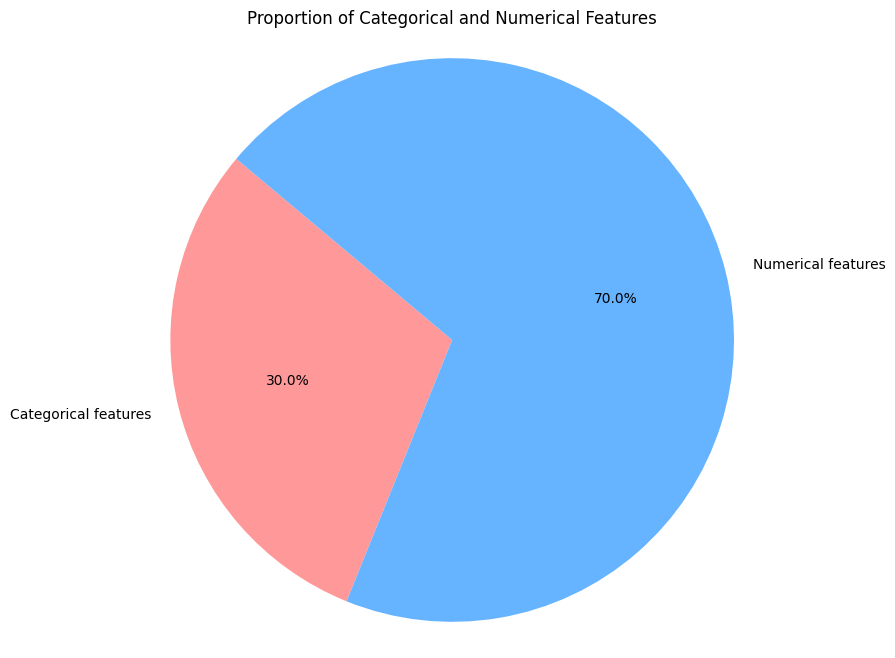

In [161]:
Target = 'price_range'
features = [col for col in train_dataset.columns if col != Target]

numerical_features = [col for col in features if train_dataset[col].nunique() > 4]

categorical_features = [col for col in features if col not in numerical_features]

num_categorical_features = len(categorical_features)
num_numerical_features = len(numerical_features)

colors = ['#ff9999', '#66b3ff']  # Define colors for categorical and numerical features
# Create a pie plot
plt.figure(figsize=(8, 8))
plt.pie([num_categorical_features, num_numerical_features], labels=['Categorical features', 'Numerical features'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportion of Categorical and Numerical Features')
plt.axis('equal')  
plt.show()

* 70 % of feature and numerical and rest is categorical features in the training dataset

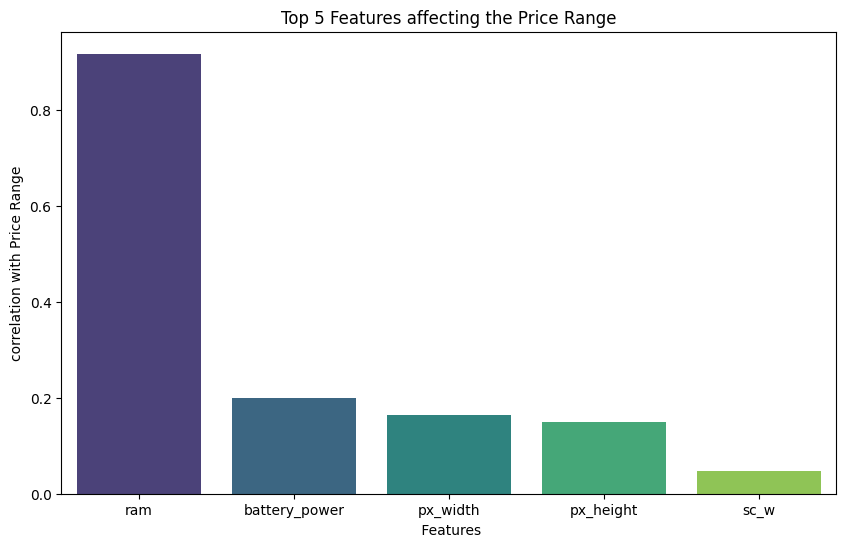

In [197]:
# Calculate correlation between features and target variable
correlation_with_price_range = train_dataset.corr()['price_range'].abs().sort_values(ascending=False)

# Select the top 5 features
top_5_features = correlation_with_price_range[1:6].index  



plt.figure(figsize=(10, 6))
sns.barplot(x= top_5_features, y=correlation_with_price_range[top_5_features], palette='viridis')
plt.title('Top 5 Features affecting the Price Range')
plt.xlabel(' Features')
plt.ylabel('correlation with Price Range')
plt.show()

* The top 5 features affecting the label(Price range is)
1. ram
2. battery_power
3.  Pixel Resolution Width
4.  Pixel Resolution height
5. Screen Width of mobile in cm

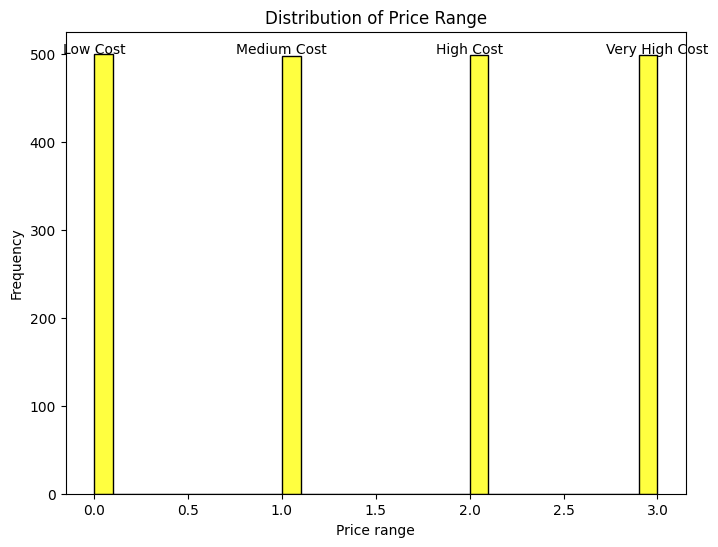

In [169]:


# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(train_dataset['price_range'], kde=False, color='yellow', bins=30)  
plt.title('Distribution of Price Range')
plt.xlabel('Price range')
plt.ylabel('Frequency')

# Add text annotations for cost labels
plt.text(0, 500, 'Low Cost', ha='center')
plt.text(1, 500, 'Medium Cost', ha='center')
plt.text(2, 500, 'High Cost', ha='center')
plt.text(3, 500, 'Very High Cost', ha='center')

plt.show()




* The distribution of all the labels are same in the training dataset

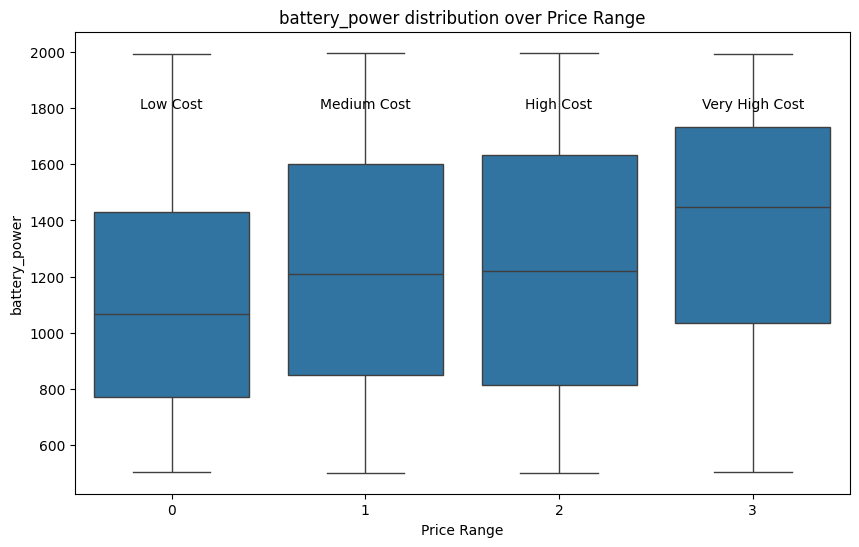

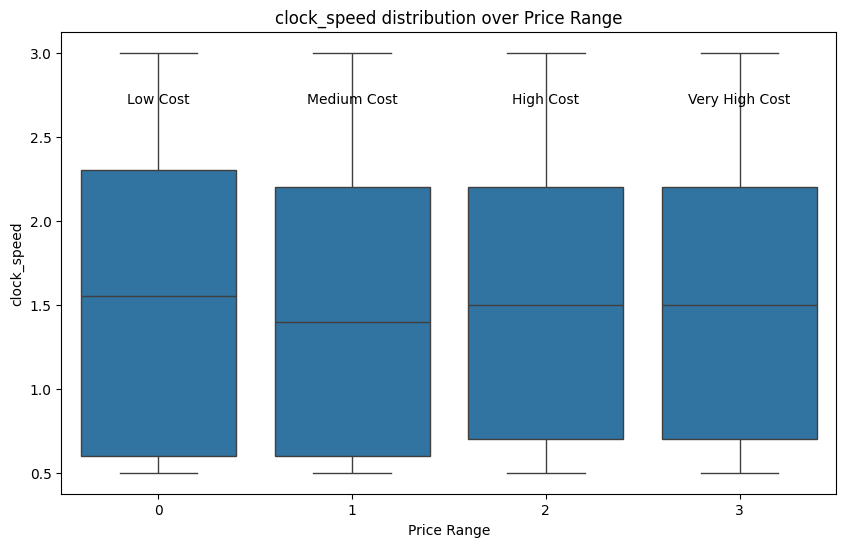

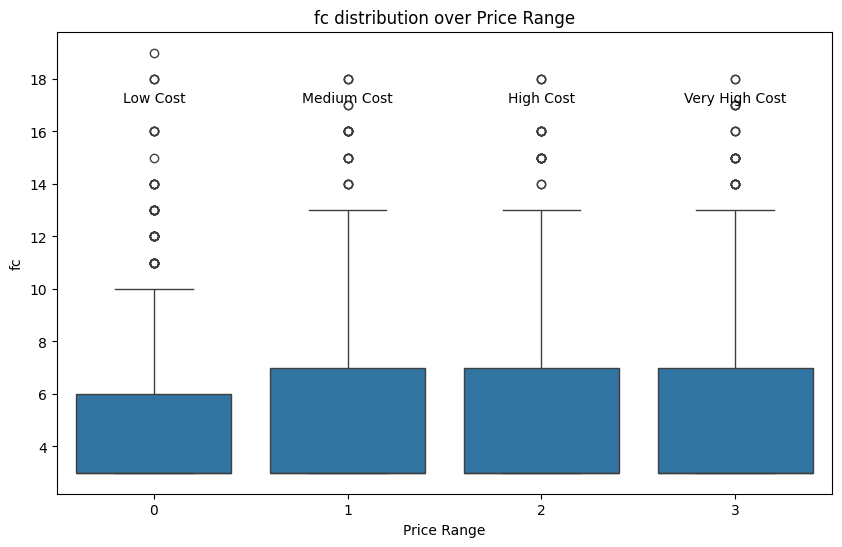

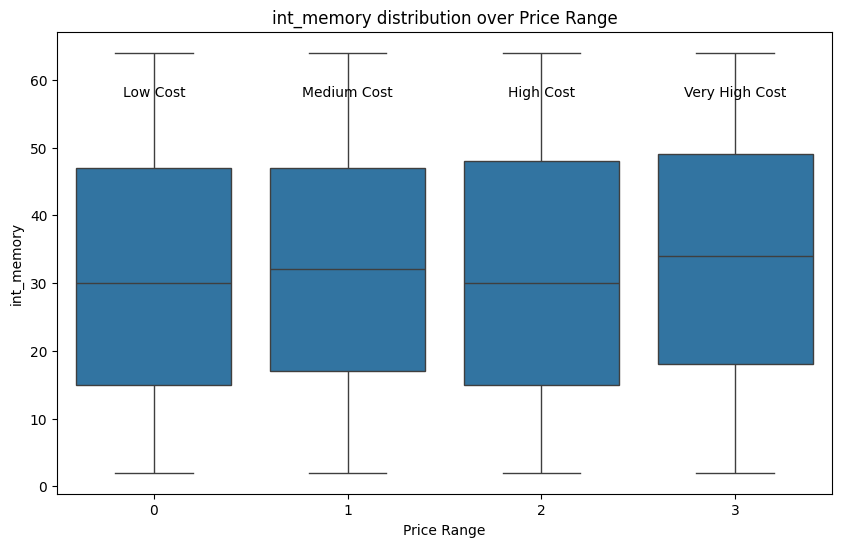

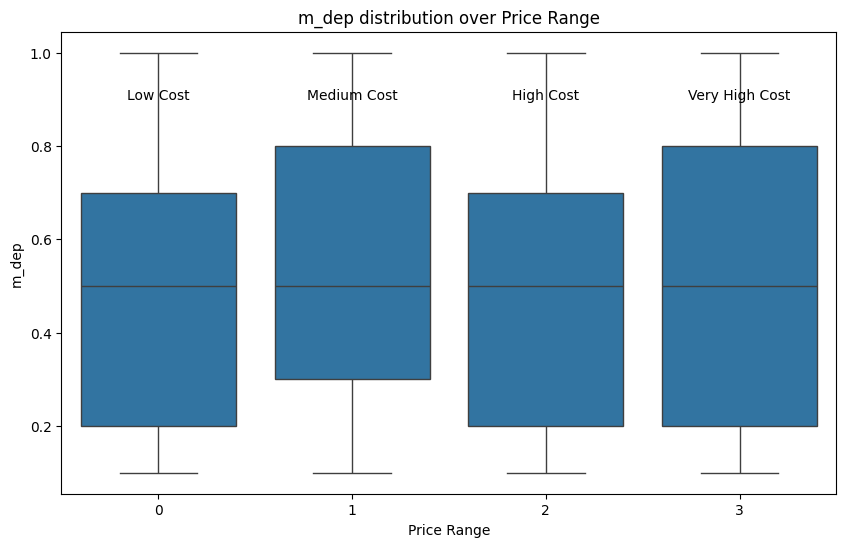

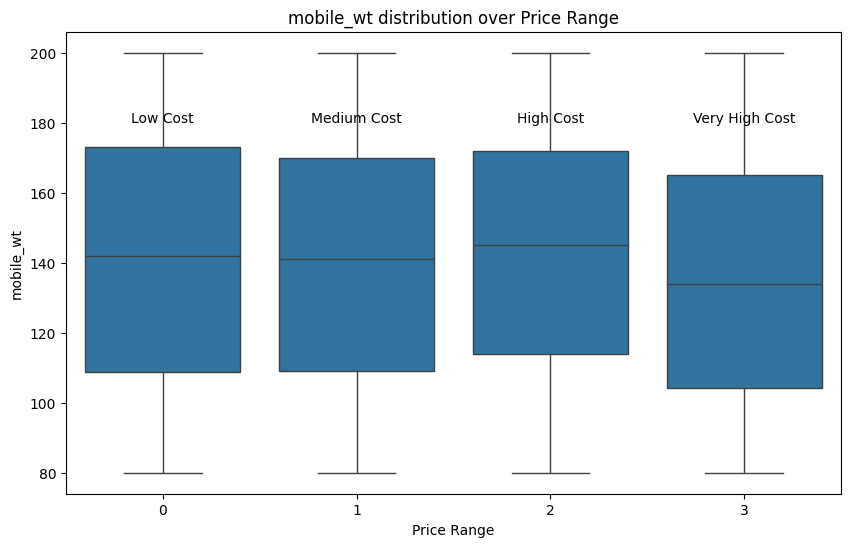

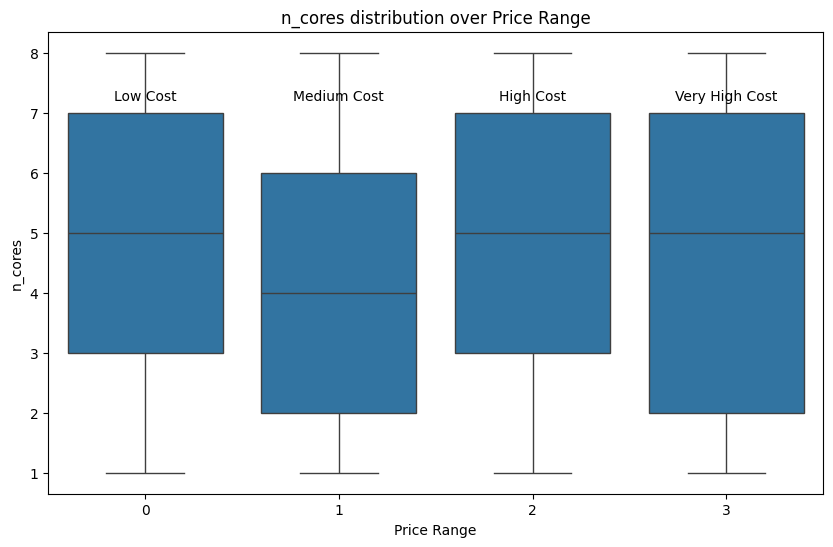

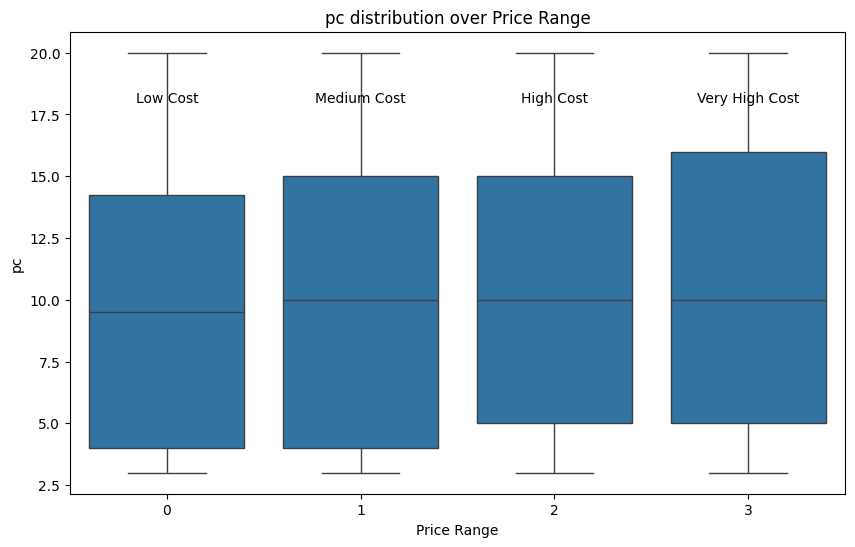

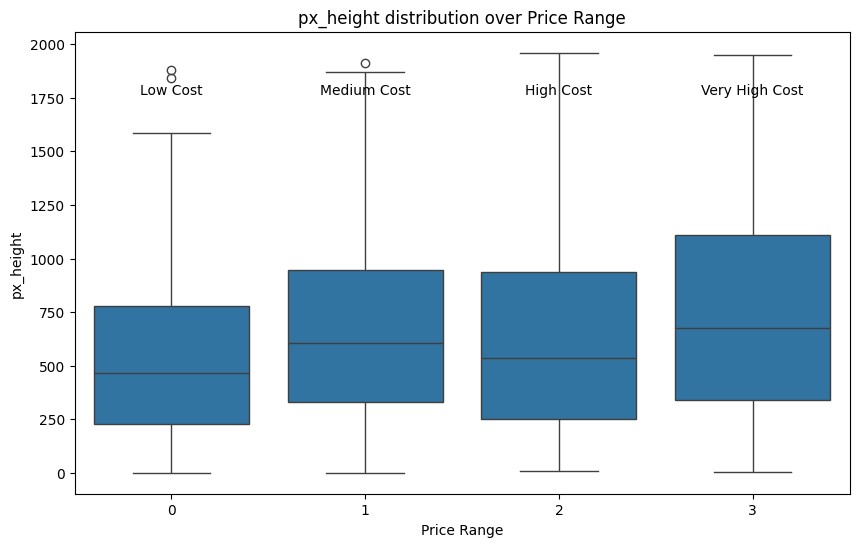

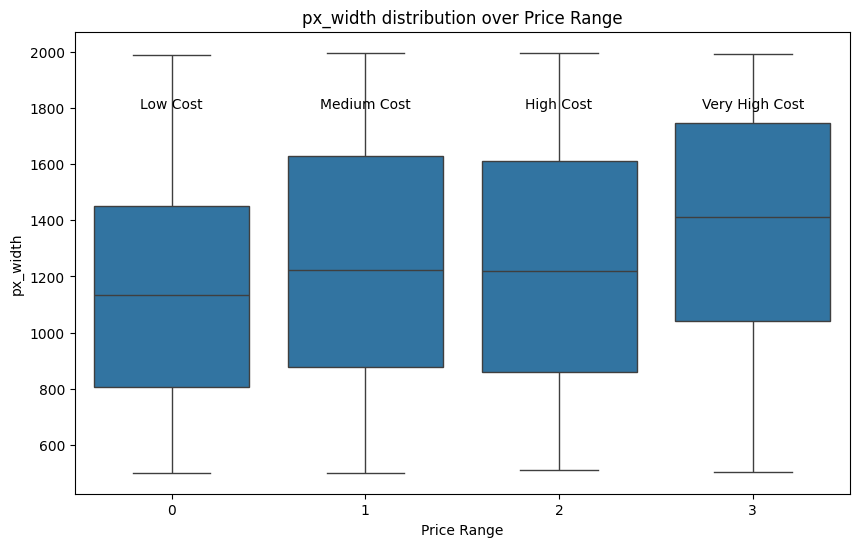

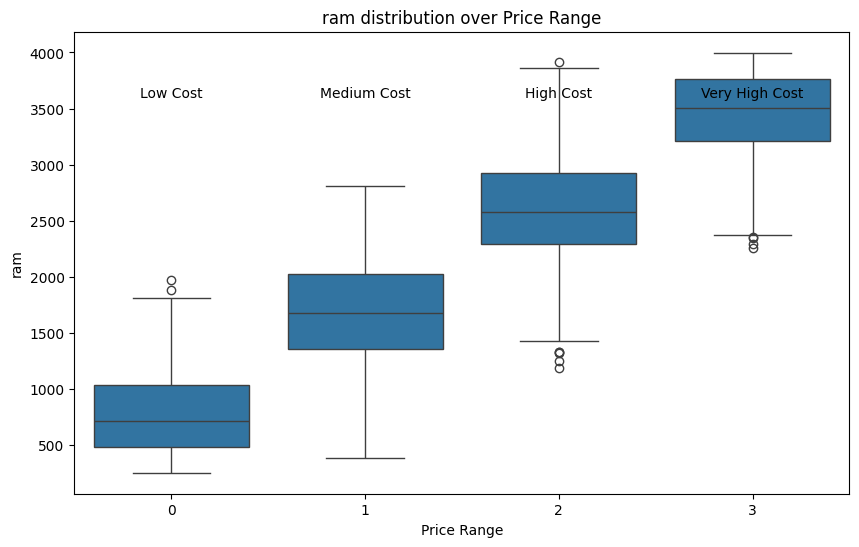

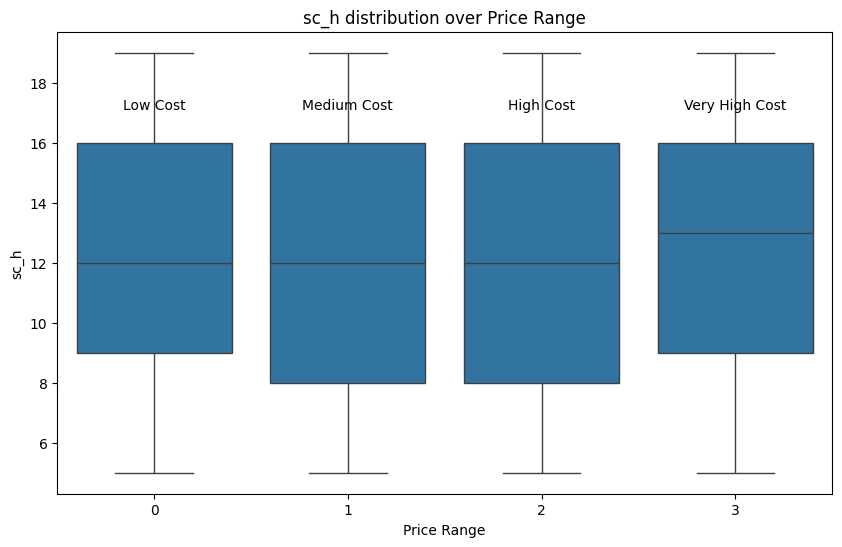

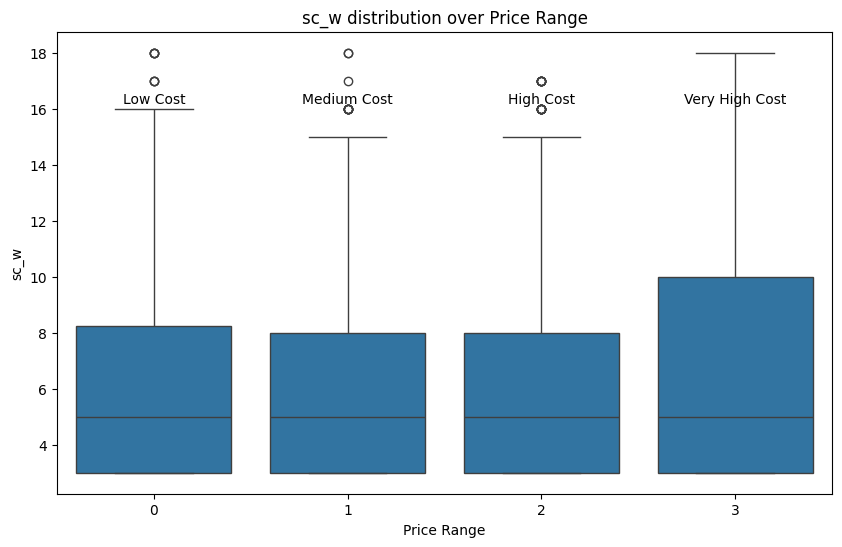

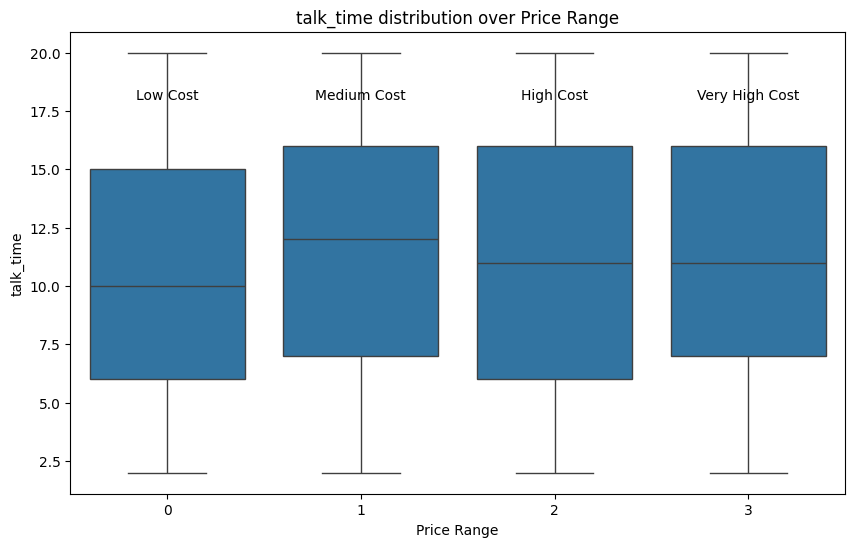

In [201]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_dataset, x='price_range', y=feature)
    plt.title(f'{feature} distribution over Price Range')
    plt.xlabel('Price Range')
    plt.ylabel(feature)
    plt.text(0, train_dataset[feature].max() * 0.9, 'Low Cost', ha='center')
    plt.text(1, train_dataset[feature].max() * 0.9, 'Medium Cost', ha='center')
    plt.text(2, train_dataset[feature].max() * 0.9, 'High Cost', ha='center')
    plt.text(3, train_dataset[feature].max() * 0.9, 'Very High Cost', ha='center')
    plt.show()


Observations

* There is a slight shift in cost from high cost to very high cost when battery power increased from the range (800-1400) to (1000- 1600).
* Devices with all price ranges mostly have the same clock speed ranging from 0.6 - 2.4. Price range does not vary much with clock speed.
* Devices with all price ranges, except low cost devices mostly have fc in the range of 2- 8 megapixel.
* Devices with lower mobile wt , ie; under 110 shows the highest cost range(3)
* Pixel height of the devices ranges from 250 to 800 for the devices with price range 0-2, and 250 to 1000 for devices with price range of 3.
*  Devices with pixel width of 800 to 1400 is in the price range of low cast, 850 to 1550 in the price range of medium cost and high cost, and 900 to    1670 in the price range of very high cost.
* Devices cost increases highly with increase in ram  



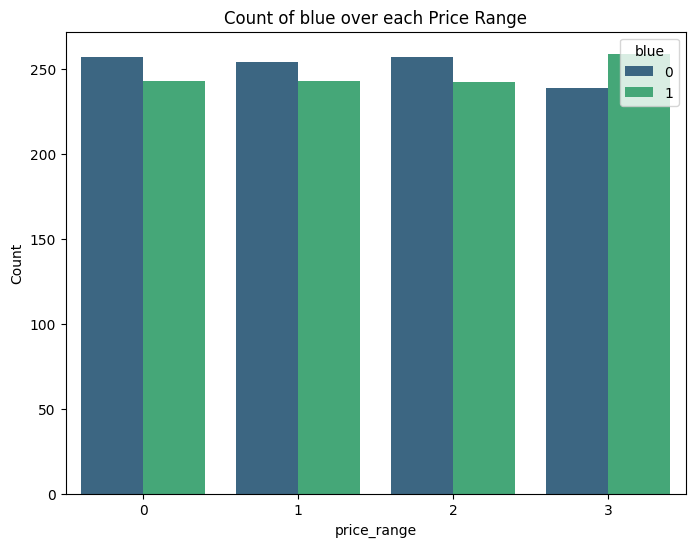

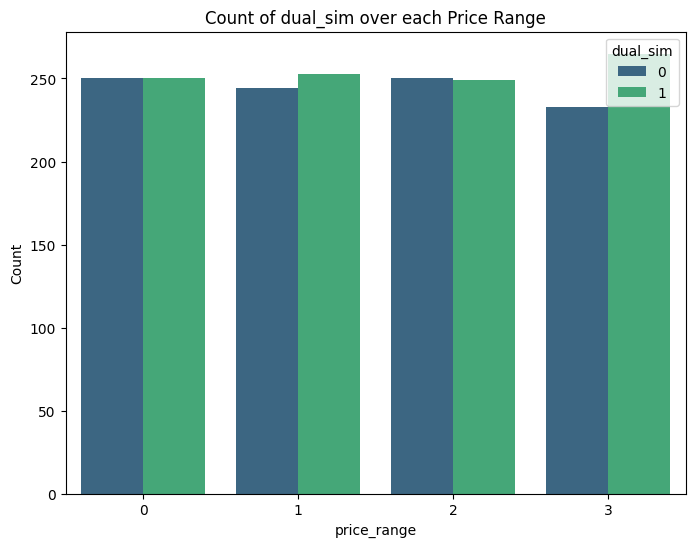

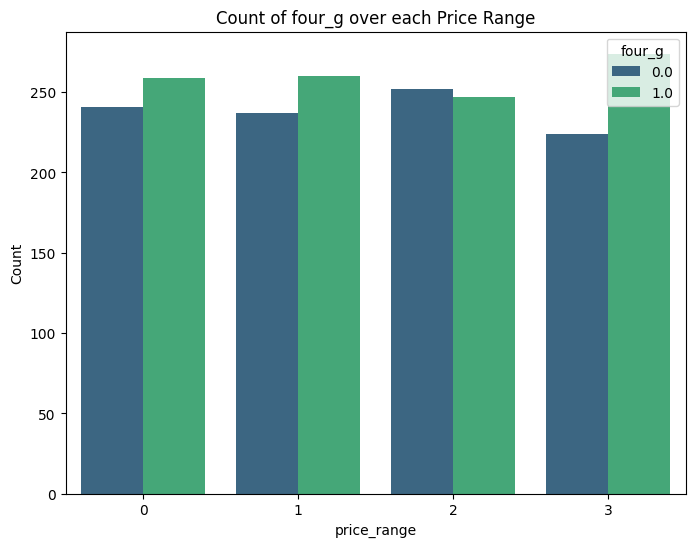

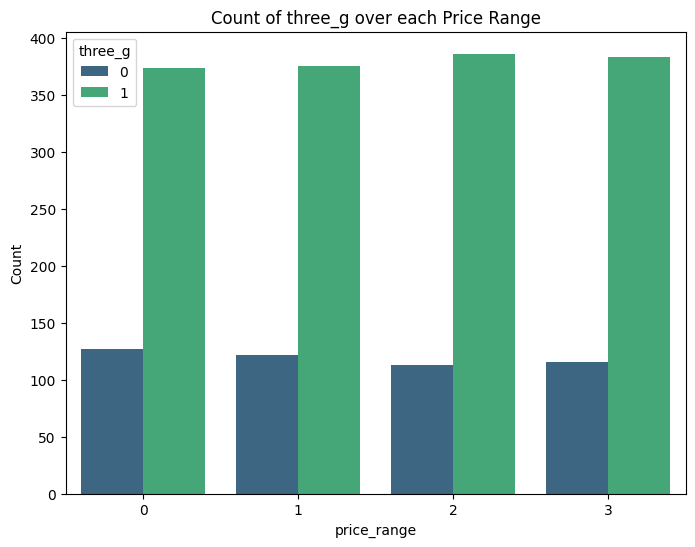

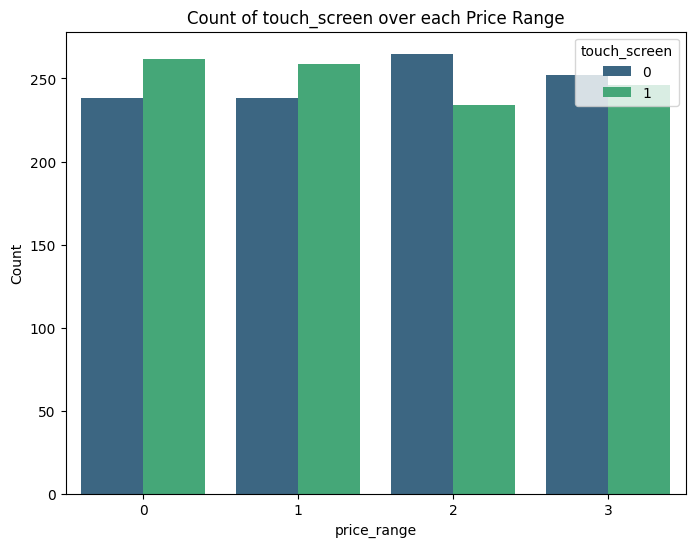

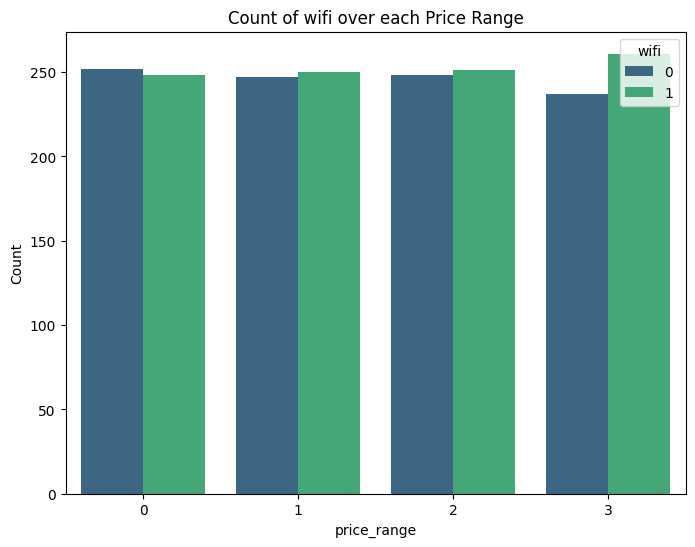

In [196]:
price_range_labels = {
    0: 'Low Cost',
    1: 'Medium Cost',
    2: 'High Cost',
    3: 'Very High Cost'
}


for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x='price_range', hue=feature, palette='viridis', data=train_dataset)
    plt.xlabel('price_range')
    plt.ylabel('Count')
    plt.title('Count of ' + feature + ' over each Price Range')
    plt.show()

* The cost of the devices is highly correlated with if the device is with 3G or not.
* The devices without bluetooth shows the highest price range than with it.